<a href="https://colab.research.google.com/github/Namtk214/Decision_Tree/blob/main/Decision%3DTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1EanytszVb3l6GJhB2YHr9OP58oUFKAnX

Downloading...
From: https://drive.google.com/uc?id=1EanytszVb3l6GJhB2YHr9OP58oUFKAnX
To: /content/Play Tennis.csv
100% 470/470 [00:00<00:00, 1.50MB/s]


In [2]:
import pandas as pd
df = pd.read_csv('/content/Play Tennis.csv')
df.head()

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [3]:
df.drop('Day', axis=1, inplace=True)
df.head()

,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


Pre-processing Data

In [4]:
from sklearn import preprocessing
string_to_int = preprocessing.LabelEncoder()
df = df.apply(string_to_int.fit_transform)
df.head()

,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


Split data into train, test sets

In [12]:
from sklearn.model_selection import train_test_split

In [10]:
X = df[['Outlook','Temprature','Humidity','Wind']]
Y = df['Play_Tennis']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#

Define and fit data into model

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [17]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

Evaluate Model

In [18]:
classifier.predict(X_test)

array([1, 1, 0])

In [19]:
X_test


,Outlook,Temprature,Humidity,Wind
9,1,2,1,1
11,0,2,0,0
0,2,1,0,1


Visualize_Tree


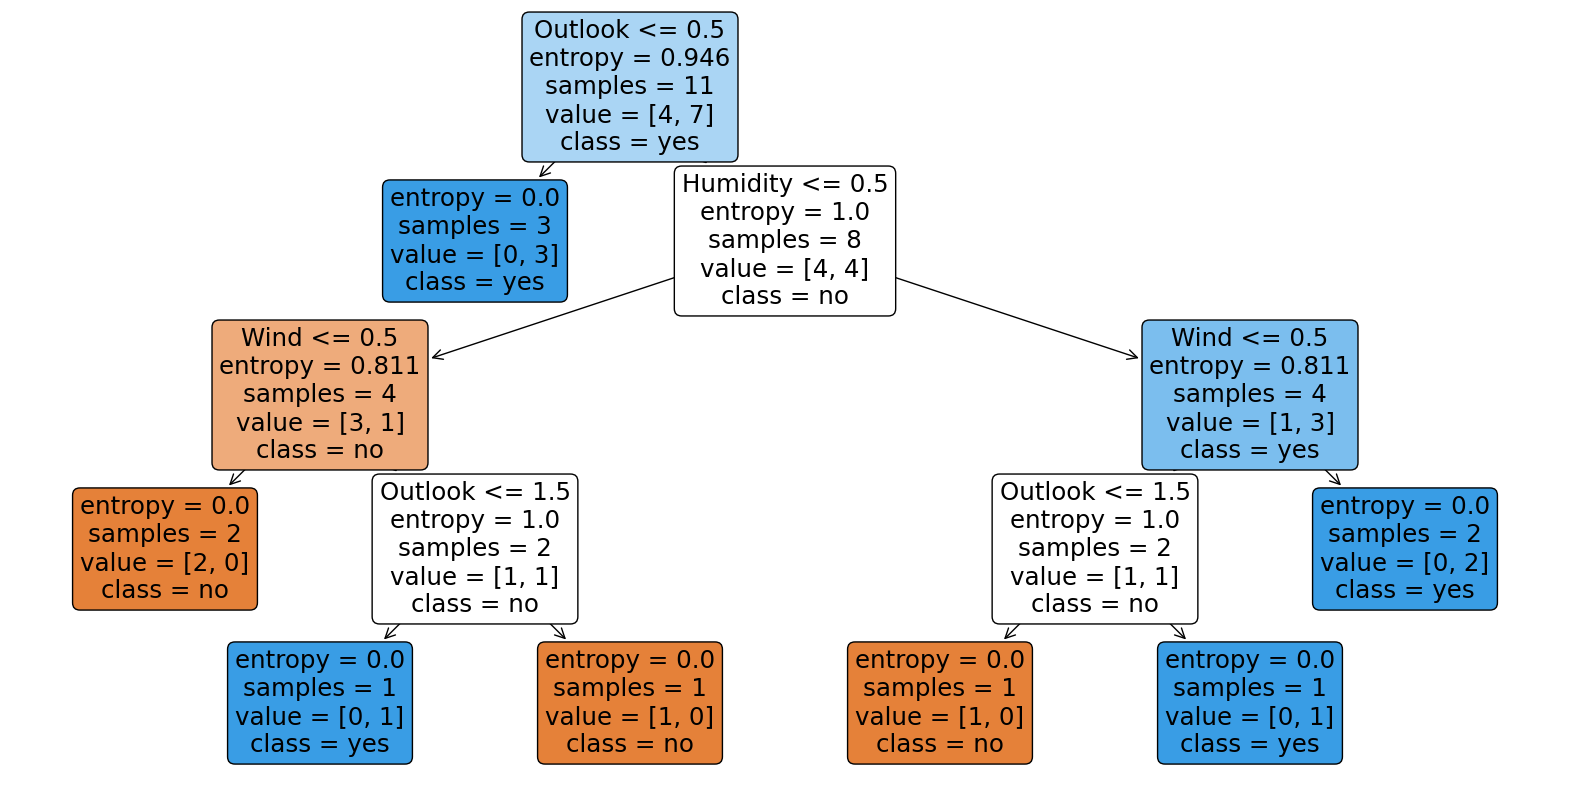

In [21]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(classifier, filled=True, feature_names=['Outlook','Temprature','Humidity','Wind'], class_names=['no', 'yes'], rounded=True)
plt.show()